In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 1. Data Understanding

In [55]:
# Read the data file
train_s3TEQDk = pd.read_csv("train_s3TEQDk.csv")
# Replace "?" with NaN
train_s3TEQDk.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
#train_s3TEQDk["Age"] = pd.to_numeric(train_s3TEQDk["Age"])
# train_s3TEQDk2 = train_s3TEQDk[:,:]
train_s3TEQDk2 = train_s3TEQDk.copy()

In [56]:
train_s3TEQDk.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [57]:
train_s3TEQDk.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

## 2. Data Preparation

In [58]:
# Imputing missing values for numerical columns with mean value
train_s3TEQDk.fillna(train_s3TEQDk.mean(), inplace=True)

In [59]:
train_s3TEQDk.tail(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245715,EJMPTVQZ,Female,26,RG270,Other,X1,19,No,903608,Yes,0
245716,JVSEPN7L,Male,41,RG282,Self_Employed,X4,14,No,368949,Yes,0
245717,LALZCPEV,Male,42,RG251,Self_Employed,X4,13,No,217266,Yes,0
245718,UMKANGED,Male,40,RG284,Self_Employed,X2,13,No,864937,Yes,0
245719,DQ48DATH,Female,38,RG280,Salaried,X2,13,Yes,354665,No,0
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0
245724,BOCZSWLJ,Male,29,RG269,Salaried,X1,21,No,1129276,No,0


In [60]:
train_s3TEQDk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


## 3. Data description and distribution

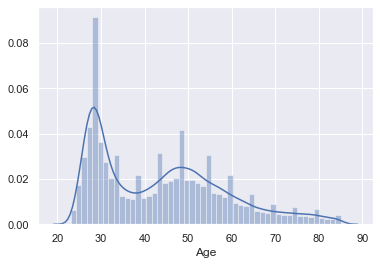

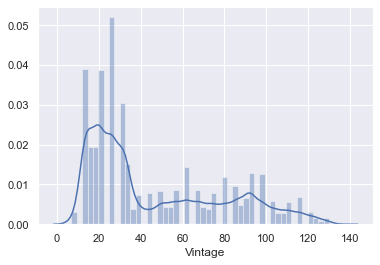

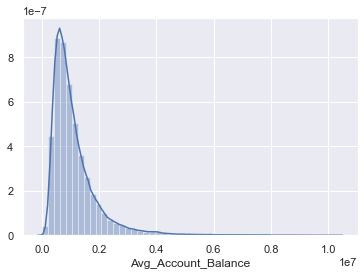

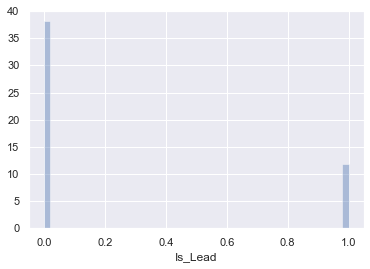

In [61]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(train_s3TEQDk['Age'])
plotDistPlot(train_s3TEQDk['Vintage'])
plotDistPlot(train_s3TEQDk['Avg_Account_Balance'])
plotDistPlot(train_s3TEQDk['Is_Lead'])

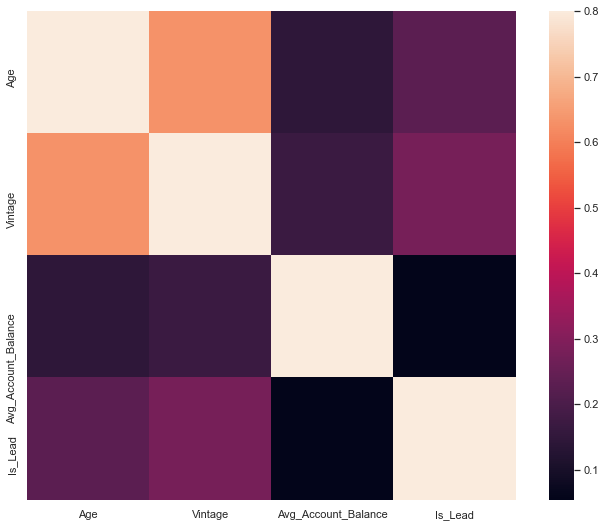

In [62]:
#correlation matrix
corrmat = train_s3TEQDk.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

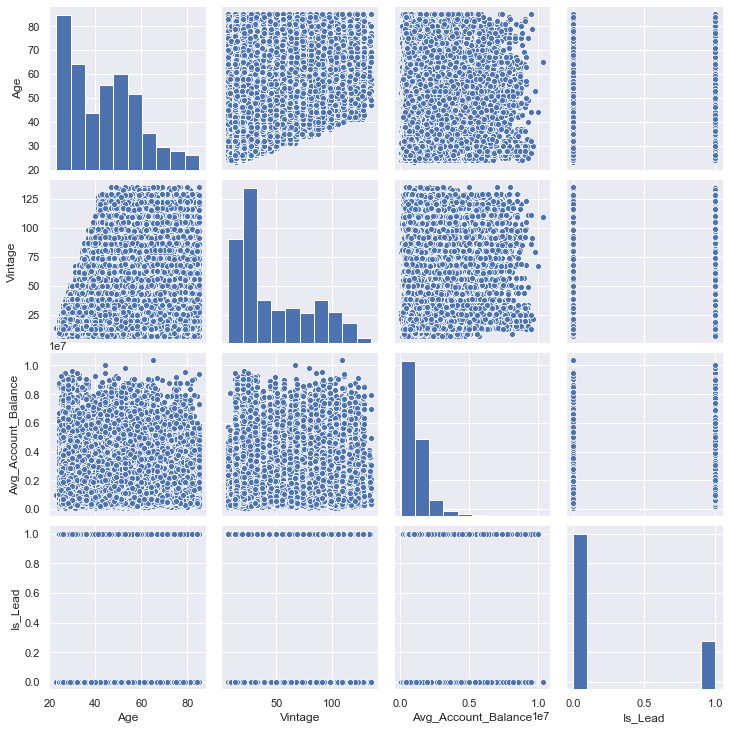

In [63]:
#scatterplot
sns.set()
cols = ['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']
sns.pairplot(train_s3TEQDk[cols], size = 2.5)
plt.show();

<AxesSubplot:xlabel='Is_Lead', ylabel='count'>

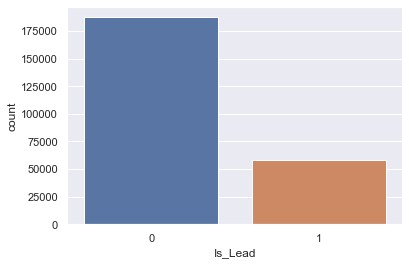

In [64]:
sns.countplot(data = train_s3TEQDk, x = 'Is_Lead')

In [65]:
train_s3TEQDk.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [66]:
print("shape of the data:", train_s3TEQDk.shape)

shape of the data: (245725, 11)


In [67]:
def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(train_s3TEQDk)

In [68]:
train_s3TEQDk.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in train_s3TEQDk:
    if train_s3TEQDk[col].dtypes=='object':
        train_s3TEQDk[col]=le.fit_transform(train_s3TEQDk[col])

In [70]:
train_s3TEQDk.tail(15)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245710,229587,0,26,4,2,0,15,0,666930,0,0
245711,47480,0,48,33,3,2,91,0,1627089,1,0
245712,84888,1,28,11,2,0,31,0,1381903,0,0
245713,64399,0,41,27,3,1,13,1,898170,1,1
245714,153501,0,46,18,3,1,19,0,993195,0,1
245715,91450,0,26,20,1,0,19,0,903608,1,0
245716,144096,1,41,32,3,3,14,0,368949,1,0
245717,157360,1,42,1,3,3,13,0,217266,1,0
245718,216371,1,40,34,3,1,13,0,864937,1,0
245719,82671,0,38,30,2,1,13,1,354665,0,0


## 4. Data Modeling and Evaluation

In [71]:
from sklearn.model_selection import train_test_split
# Removing the feature which are not important and converting to NumPy array
train_s3TEQDk = train_s3TEQDk.drop(['ID', 'Channel_Code'], axis=1)
train_s3TEQDk = train_s3TEQDk.values

In [72]:
#CHANGES 13 TO 8 BECAUSE OF SIZE ERROR
# Creating new variable to input features and labels
X_train, y_train = train_s3TEQDk[:,0:8] , train_s3TEQDk[:,8]

# Spliting the data into training and testing sets
#X_train, y_train = X, y
#X_train, X_test, y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=123)




In [73]:
test_mSzZ8RL = pd.read_csv("test_mSzZ8RL.csv")
# Imputing missing values for numerical columns with mean value
test_mSzZ8RL.fillna(test_mSzZ8RL.mean(), inplace=True)

def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(test_mSzZ8RL)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in test_mSzZ8RL:
    if test_mSzZ8RL[col].dtypes=='object':
        test_mSzZ8RL[col]=le.fit_transform(test_mSzZ8RL[col])

test_mSzZ8RL = test_mSzZ8RL.drop(['ID', 'Channel_Code'], axis=1)
test_mSzZ8RL = test_mSzZ8RL.values
X_test, Y_test = train_s3TEQDk[:,0:8] , train_s3TEQDk[:,8]


In [74]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [75]:
X, y = train_s3TEQDk[:,0:8] , train_s3TEQDk[:,8]
rescaledX = scaler.transform(X)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))
# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Random Forest classifier has accuracy of:  0.9999918608200223


array([[187437,      0],
       [     2,  58286]], dtype=int64)

According to the Random Forest Classifier, Vintage is the most important feature, followed by Occupation and Gender.

Feature ranking:
1. feature 6 (0.350027)
2. feature 4 (0.217835)
3. feature 1 (0.216283)
4. feature 2 (0.131974)
5. feature 3 (0.045777)
6. feature 5 (0.014357)
7. feature 7 (0.014184)
8. feature 0 (0.009563)


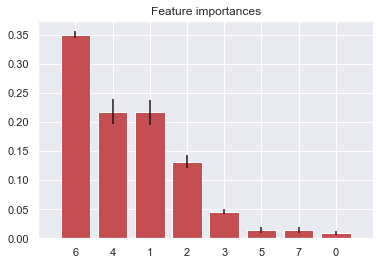

In [77]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Which attribute has played most important role in credit card request decision?

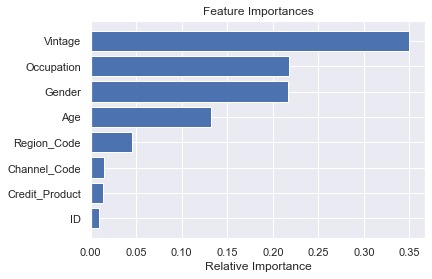

In [78]:
# copy of train_s3TEQDk is in train_s3TEQDk2
train_s3TEQDk2 = train_s3TEQDk2.drop(['Is_Lead'], axis=1)

features = train_s3TEQDk2.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [79]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Fitting logistic regression with default parameter values
logreg = LogisticRegression()
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

In [80]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Using the trained model to predict instances from the test set
y_pred = logreg.predict(rescaledX_test)

# Getting the accuracy score of predictive model
print("Logistic regression classifier has accuracy of: ", logreg.score(rescaledX_test, Y_test))

# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Logistic regression classifier has accuracy of:  0.7561542374605759


array([[180977,   6460],
       [ 53459,   4829]], dtype=int64)

In [81]:
#You can solve the issue with one line of code to convert ndarray to pandas df and then to csv file.

pd.DataFrame(train_s3TEQDk).to_csv("test_output.csv")

In [82]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary
param_grid = dict(tol=tol, max_iter=max_iter)

In [83]:
# Initializing GridSearchCV
grid_model = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Rescaling the entire data set with all the predictive features
rescaledX = scaler.fit_transform(X)

# Calculating and summarizing the final results
grid_model_result = grid_model.fit(rescaledX, y)
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_ 
print("Best: %f using %s" %  (best_score, best_params))

Best: 0.756126 using {'max_iter': 100, 'tol': 0.01}
